# Análisis ANOVA
Leonardo Bravo

## Ejemplo
Una industria de automóviles desea probar la calidad de 3 tipos de combustibles. Para ello observa el rendimiento de los tres tipos de combustibles en 15 vehículos idénticos (5 con cada tipo de combustible). Los resultados (en millas por 10 galones de combustible) se describen a continuación:

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2310a0b450>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2310a0bf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2310a01790>,
 'medians': [<matplotlib.lines.Line2D at 0x7f2310992990>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2310992e90>,
 'means': []}

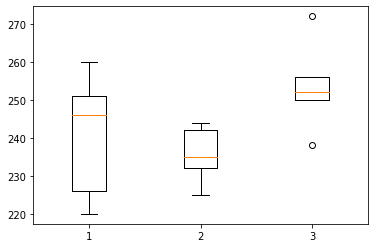

In [5]:
import matplotlib.pyplot as plt

# data
gas1 = [220,251,226,246,260]
gas2 = [244,235,232,242,225]
gas3 = [252,272,250,238,256]

# Data analysis
fig, ax = plt.subplots()
ax.boxplot([gas1, gas2, gas3])

In [7]:
# Anova test

import scipy.stats as stats

stats.f_oneway(gas1, gas2, gas3)

F_onewayResult(statistic=2.6009238802972487, pvalue=0.11524892355706169)

## Ejercicio 1
Desarrolle el ANOVA manualmente y compruebe los resultados entregados con R.

$$TS = \frac{MSB}{MSE} = \frac{varianza \, entregrupos}{varianza \, intragrupos}$$


In [31]:
import numpy as np

# samplings
m = 3
# number of samplings
n = 5

# means
mean_1 = np.mean(gas1)
mean_2 = np.mean(gas2)
mean_3 = np.mean(gas3)
global_mean = np.mean([mean_1, mean_2, mean_3])

# SSb computing (between groups variance)
SSb = n*((mean_1 - global_mean)**2 + (mean_2 - global_mean)**2 + (mean_3 - global_mean)**2)

# Compute MSB
MSB = SSb / (m-1)

# SSw (intra groups variance)
SSw = np.sum((gas1 - mean_1)**2) + np.sum((gas2 - mean_2)**2) + np.sum((gas3 - mean_3)**2)

# compute MSE
MSE = SSw/(n*m - m)

# Copmute TS statistic
TS = MSB / MSE

print("Statistic value (TS): ", TS)

Statistic value (TS):  2.6009238802972483


Se obtienen mismo valor de estadístico que valor obtenido desde librería.

Considerando nivel de significancia de 0.05 y el  valor de p de 0.11, la evidencia de la data no permite rechazar hipotesis nula, es decir, que no se puede rechazar que las medias son iguales.

## Ejercicio 2
Desarrolle un ejemplo de ANOVA en R con muestras de tamaños distintos. Interprete sus resultados.

240.66666666666666
238.25
253.42857142857142


{'whiskers': [<matplotlib.lines.Line2D at 0x7f230dc8c750>,
 'caps': [<matplotlib.lines.Line2D at 0x7f230dcfbb10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f230dcfbad0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f230dc99c90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f230dc8cd90>,
 'means': []}

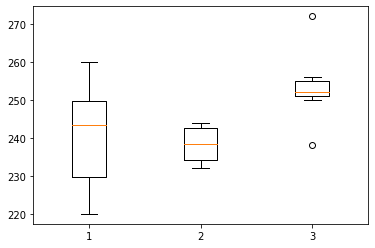

In [40]:
import matplotlib.pyplot as plt

# data
gas1 = np.asarray([220,251,226,246,260, 241])
gas2 = np.asarray([244,235,232,242])
gas3 = np.asarray([252,272,250,238,256, 252, 254])

print(np.mean(gas1))
print(np.mean(gas2))
print(np.mean(gas3))

# Data analysis
fig, ax = plt.subplots()
ax.boxplot([gas1, gas2, gas3])

In [41]:
# Anova test

import scipy.stats as stats

stats.f_oneway(gas1, gas2, gas3)

F_onewayResult(statistic=2.9833856082392747, pvalue=0.08331848369775648)

Se generan muestras de diferentes tamaños con valores cercanos a la media de cada muestra. Se aplica ANOVA test y se obtiene valor de p-value de 0.083. Considerando nivel de significancia de 0.05, se tiene evidencia para no rechazar hipótesis nula, por lo que no se puede rechazar que las medias son iguales.

## Ejercicio 3
Considere datos de cesantía del INE: https://www.ine.cl/estadisticas/laborales/ene, escoja 3 o más regiones y realice un ANOVA para determinar si el porcentaje de cesantìa se comporta igual o no (en términos de valores medios) en dichas regiones, en el curso de los últimos 12 meses. Si rechaza  𝐻0  desarrolle comparaciones múltiples para determinar como difieren.

In [1]:
!pwd

/home/leo/Desktop/master_UACH/2S-2019/statistics/activities/Anova activy


In [126]:
import pandas as pd
import matplotlib.pyplot as plt

df_raw = pd.read_excel("/home/leo/Downloads/comparacion-regional-de-indicadores-principales (1).xlsx", "td")
df_raw.shape
# df_raw.head()

plots = 20
df = df_raw.iloc[:, 0:plots]

display(df.head())
display(df.columns)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Nacional,Región de Tarapacá,Región de Antofagasta,Región de Atacama,Región de Coquimbo,Región de Valparaíso,Región del Libertador General Bernardo O'Higgins,Región del Maule,Región del Biobío,Región de La Araucanía,Región de Los Lagos,Región de Aysén del General Carlos Ibáñez del Campo,Región de Magallanes y de la Antártica Chilena,Región Metropolitana de Santiago,Región de Los Ríos,Región de Arica y Parinacota,Región del Ñuble
0,2010,Ene - Mar,Ene - Mar 2010,9.039739,6.556588,8.574838,9.439241,9.970843,11.066579,6.014567,7.797960,10.215104,8.206970,6.977960,3.985961,4.589642,9.352036,11.099056,7.747953,8.679000
1,2010,Feb - Abr,Feb - Abr 2010,8.626942,5.604149,6.964308,7.990156,9.393247,10.447545,5.341926,7.313656,10.606806,8.031039,6.991622,3.502484,5.419358,8.903039,8.685522,7.690705,10.608621
2,2010,Mar - May,Mar - May 2010,8.825886,5.904426,7.685725,8.917735,9.174787,10.832157,6.365615,7.722172,10.620704,8.165051,7.475453,5.357064,5.982361,8.826625,8.609145,7.269450,12.238024
3,2010,Abr - Jun,Abr - Jun 2010,8.487787,5.995014,6.907097,8.213280,8.081555,10.238104,6.408576,8.004443,9.999706,9.231920,8.348149,6.607927,5.677067,8.275454,8.466949,6.764079,10.867079
4,2010,May -Jul,May -Jul 2010,8.314733,4.899101,7.835302,7.969251,8.440544,10.141451,7.886504,8.187687,9.957881,9.577699,8.229189,7.538962,4.587382,7.769594,8.929640,5.564949,8.730333


Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Nacional',
       'Región de Tarapacá', 'Región de Antofagasta', 'Región de Atacama',
       'Región de Coquimbo', 'Región de Valparaíso',
       'Región del Libertador General Bernardo O'Higgins', 'Región del Maule',
       'Región del Biobío', 'Región de La Araucanía', 'Región de Los Lagos',
       'Región de Aysén del General Carlos Ibáñez del Campo',
       'Región de Magallanes y de la Antártica Chilena',
       'Región Metropolitana de Santiago', 'Región de Los Ríos',
       'Región de Arica y Parinacota', 'Región del Ñuble'],
      dtype='object')

## By region plot

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

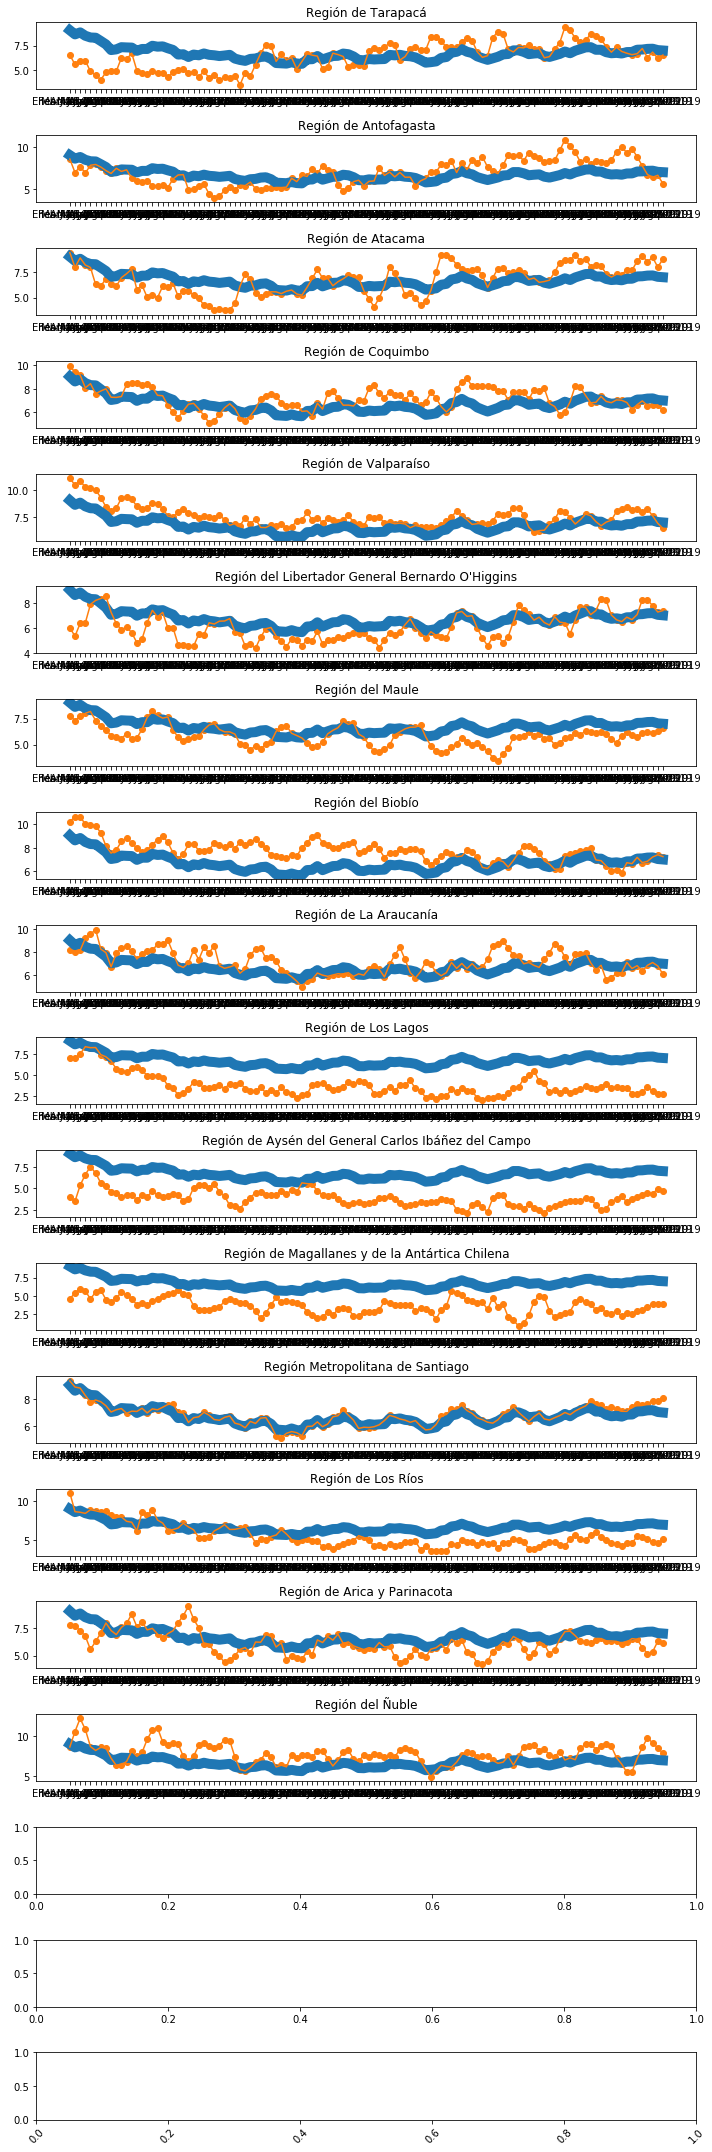

In [121]:
fig, ax = plt.subplots(plots-1, 1, tight_layout = True, figsize = (10,30))
# fig, ax = plt.subplots(1, 1, tight_layout = True, figsize = (20,10))

for i in range(4, plots):
# for i in range(4, 6):
    
    # add nacional
    ax[i-4].scatter(df.iloc[:,2] ,df.iloc[:, 3])
    ax[i-4].plot(df.iloc[:,2], df.iloc[:, 3], label = df.columns[3], linewidth = 10)
    
    # add region
    ax[i-4].scatter(df.iloc[:,2] ,df.iloc[:, i])
    ax[i-4].plot(df.iloc[:,2], df.iloc[:, i])
    ax[i-4].set_title(df.columns[i])

plt.xticks(rotation=45)
    
# plt.legend()
#     ax.set_title(df.columns[i])
# ax.set_xticklabels(larotation=45 ) ;
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

## All regions plot

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115],
 <a list of 116 Text xticklabel objects>)

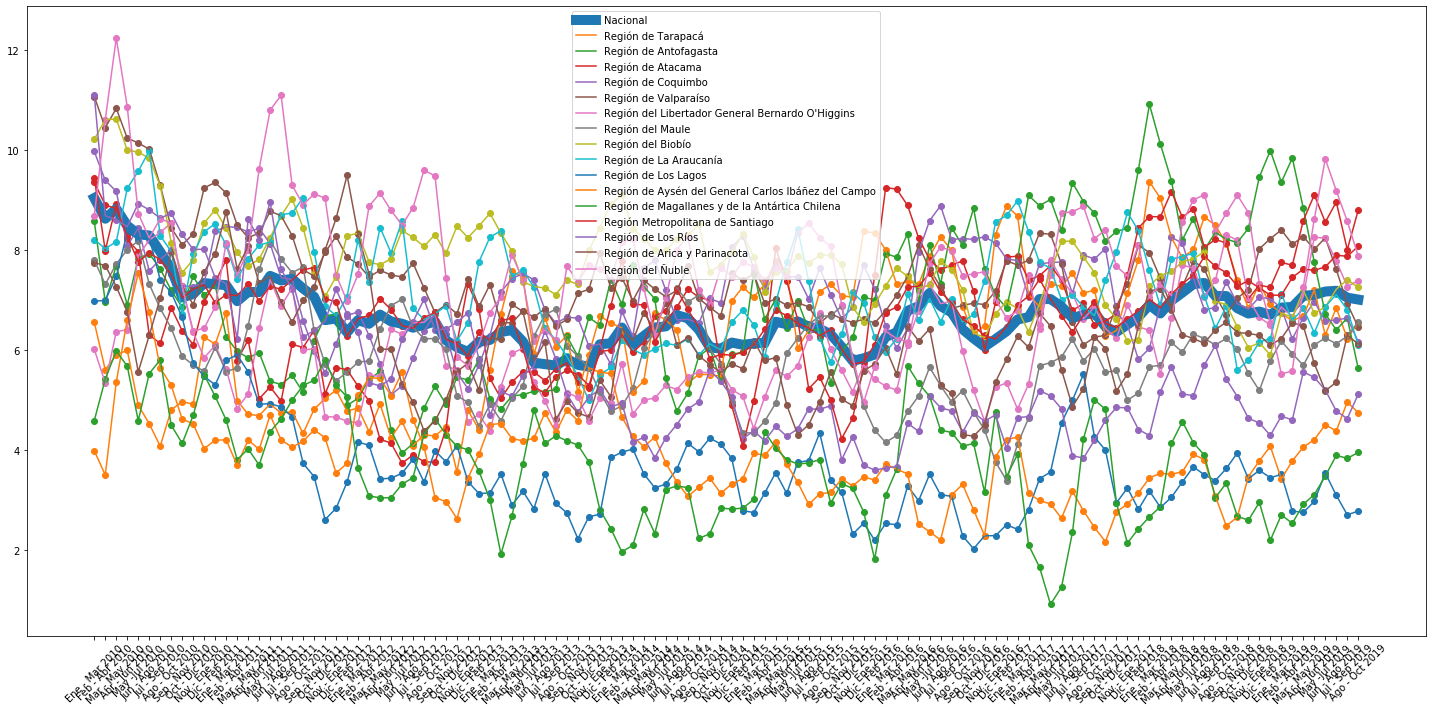

In [122]:
# fig, ax = plt.subplots(1, plots, tight_layout = True, figsize = (10,4))
fig, ax = plt.subplots(1, 1, tight_layout = True, figsize = (20,10))

# add nacional
ax.scatter(df.iloc[:,2] ,df.iloc[:, 3])
ax.plot(df.iloc[:,2], df.iloc[:, 3], label = df.columns[3], linewidth = 10)
    
for i in range(4, plots):
    
#     ax[i-3].scatter(df.iloc[:,2] ,df.iloc[:, i])
#     ax[i-3].plot(df.iloc[:,2], df.iloc[:, i])
#     ax[i-3].set_title(df.columns[i])
    ax.scatter(df.iloc[:,2] ,df.iloc[:, i])
    ax.plot(df.iloc[:,2], df.iloc[:, i], label = df.columns[i])

plt.legend()
#     ax.set_title(df.columns[i])
plt.xticks(rotation=45)
# ax.set_xticklabels(larotation=45 ) ;
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

## Taking last 12 months and analyzing regions means differences

In [187]:
num_regions = 7
regions_to_compare = num_regions - 4
df_analysis = df.iloc[:, 4:num_regions]

print(df_analysis.describe())
print(df_analysis.shape)

       Región de Tarapacá  Región de Antofagasta  Región de Atacama
count          116.000000             116.000000         116.000000
mean             6.389924               6.962384           6.714490
std              1.318824               1.496532           1.435623
min              3.561580               3.937985           3.737329
25%              5.157391               5.769900           5.597981
50%              6.553563               6.938059           6.870531
75%              7.313734               8.114188           7.788948
max              9.366057              10.912449           9.439241
(116, 3)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f7e938b6b10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7e938bd590>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7e938aee10>,
 'medians': [<matplotlib.lines.Line2D at 0x7f7e938bdfd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7e938c1510>,
 'means': []}

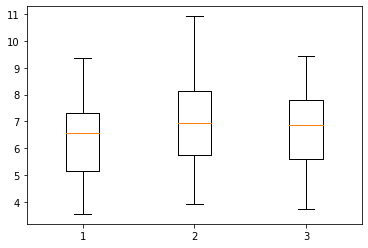

In [165]:
# analysing median wiht boxplots
fig, ax = plt.subplots()
ax.boxplot([df_analysis.iloc[:, serie].values for serie in range(num_regions-4)])

Del gráfico boxplot, se observa que se tienen distribuciones similares, por lo que quizás las medias sean similares.

In [188]:
# Apply ANOVA test
import scipy.stats as stats

stats.f_oneway(df_analysis.iloc[:, 0], df_analysis.iloc[:, 1], df_analysis.iloc[:, 2])

F_onewayResult(statistic=4.748621729097019, pvalue=0.009237939634232098)

Al considerar valor de significancia de 0.05 y, considerando p-value obtenido de 0.0092, se rechaza hipotesis nula en favor de hipotesis alternativa, por lo que existe al menos un par de regiones con diferencias significativas entre sus medias. Esto implica que el factor región, si tiene incidencia sobre la tasa de desempleo. 

Para encontrar muestras específicas con diferencias, se realiza comparaciones múltiples.

In [194]:
import pandas as pd
import statsmodels.stats.multicomp as ml
import numpy as np

# display(df_analysis.iloc[:, 0])
# display(type(df_analysis.iloc[:, 0].values))
# print(num_regions)
regions = []
for region in range(regions_to_compare):
    
    for i in range(df_analysis.iloc[:, region].shape[0]):
    #     print(i)
        regions.append(df_analysis.columns[region])
    
# print(regions)
desempleos = np.concatenate((df_analysis.iloc[:, 0].values, df_analysis.iloc[:, 1].values, df_analysis.iloc[:, 2].values), axis = 0)
# Tuckey' Test
mcobj = ml.MultiComparison(desempleos, regions)
out = mcobj.tukeyhsd(0.05) 

print(out)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
        group1              group2       meandiff p-adj   lower   upper  reject
-------------------------------------------------------------------------------
Región de Antofagasta  Región de Atacama  -0.2479 0.3805 -0.6865  0.1907  False
Región de Antofagasta Región de Tarapacá  -0.5725 0.0065  -1.011 -0.1339   True
    Región de Atacama Región de Tarapacá  -0.3246 0.1913 -0.7631   0.114  False
-------------------------------------------------------------------------------


De los resultados del test Tukey, se tiene que el único par de relaciones en las que se rechaza hipótesis nula (con significancia de 0.05), corresponde a relación entre Región de Antofagasta y Región de Tarapacá, de esta forma, estas 2 regiones poseen medias diferentes. Las demás relaciones entre grupos no obtienen valores suficientes para rechazar equivalencia entre sus medias.

## Conclusiones generales de los datos obtenidos
Al analizar 3 regiones (Antofagasta, Atacama y Tarapacá), mediante test de ANOVA, se concluye que existen diferencias significativas que permiten rechazar hipótesis nula de que medias entre regiones son iguales. Esto quiere decir que el factor región tiene influencia sobre la tasa de desempleo.

Al realizar test de comparaciones múltiples (Tukey), se obtiene que la tasa de desempleo entre la región de Atacama y Tarapaca, poseen medias diferentes. En las demás regiones no es posible definir esta afirmación.